1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/usuarios_win_mac_lin.csv")

In [3]:
#y = target
y = df['duracion']
X = df[["paginas", "acciones", "valor", "clase"]]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
paginas,14.590111
acciones,10.632812
valor,-1.415855
clase,27.345031


In [7]:
y_predictions = model.predict(X_test)
y_predictions

array([ 58.18034103, 115.7021126 , 101.11200143, 279.29289611,
        79.07001144,  61.74610875,  80.87404874, 119.61710457,
       552.39046318, 182.99799031, 134.13602798, 105.83451265,
        89.80074145,  32.95741756, 210.5833147 , 157.51260727,
        93.64454567, 171.14623427,  59.91426604, 144.07481569,
        56.41633763, 133.77565071,  62.77378068, 105.9990545 ,
        57.80438682, 191.25846384,  62.77378068,  98.2802922 ,
       106.08139528, 108.23465684,  91.24440148,  42.95181609,
        61.59487084,  40.75852064])

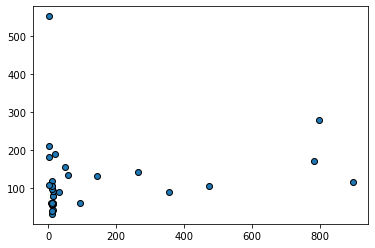

In [8]:
plt.scatter(y_test, y_predictions, edgecolor='black')
# Seems the model does not work correctly?

1. ¿Qué acierto tiene? (score)

In [25]:
model.score(X, y)

0.0953388415245322

2. ¿Cuál es el RMSE? ¿Dirías que es un valor alto?

In [27]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_predictions))

159.48037208507807

Yes, it seems like a very high value.

3. Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?


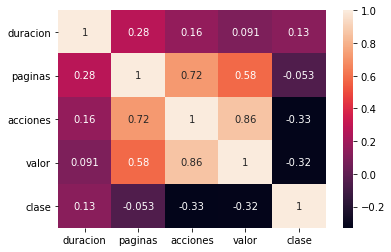

In [30]:
sns.heatmap(df.corr(),  annot = True)

There is not much correlation between duracion and the other columns. 

¿Es la regresión un buen método para este dataset?

I don´t think the linear regression method is correct for this dataset, as there is not enough correlation between the duration and the other columns to draw make a good prediction. 